<a href="https://colab.research.google.com/github/chidinma-godwin/fraud-detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
This notebook aims to explore the application of machine learning models for credit card fraud detection. Using a publicly available dataset containing anonymized credit card transactions, we will investigate patterns and trends in transaction data and develop predictive models capable of identifying fraudulent activities.

The following key aspects will be covered:

- [Data Exploration:](#scrollTo=qJEdemgKqFO_) We will begin by exploring the dataset to understand its structure, features, and class distribution.

- [Data Preprocessing:](#scrollTo=peRPDPNomrNP) The unscaled columns in the Data will be scaled and the data would be splitted into Traning and Test data using StratifiedKFold to ensure that both the train and test data would have equal distribution of the target classes.

- [Model Development Using the Imbalanced Dataset:](#scrollTo=iDVaUXborPMS) We will train and evaluate logistic regression, k nearest neighbour, random forests, and support vector machines classifiers on the imbalanced dataset. The performance of each model will be assessed using appropriate evaluation metrics, including precision, recall, F1-score, and Area Under the Precision-Recall curve (AUC-PR).

- [Model Development Using the Undersampled Dataset:](#scrollTo=VJPuJ6nQsFgh) Pycaret would be used to undersample the imbalanced dataset using NearMiss technique, the resulting undersampled data would be explored, trained using logistic regression, k nearest neighbour, random forests, and support vector machines classifiers, and the performance of the models would be evaluated using appropriate evaluation metrics.

- [Model Development Using the Oversampled Dataset:](#scrollTo=1onIS6xazdY6) Pycaret would also be used to oversample the imbalanced dataset using SMOTE technique, we would compare the performance of logistic regression, k nearest neighbour, random forests, and support vector machines classifiers on the oversampled dataset. The performance of the models would be evaluated using appropriate evaluation metrics

- [Model Tuning:](#scrollTo=bALBLv7fTxAN) The best performing model will be optimized and tuned using hyperparameter tuning to try and achieve optimal performance.

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.3 M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries

# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# import libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Import library for counting hashable objects
from collections import Counter

# Import pycaret modules that will be used for the classification
from pycaret.classification import setup, compare_models, plot_model, \
tune_model, save_model, predict_model, get_config, pull

# Import modules for data preprocessing
from sklearn.decomposition import PCA
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import RobustScaler

## Data Exploration
Due to confidentiality issues, the dataset contains anonymized features representing various transaction attributes, as well as a binary target variable indicating whether a transaction is fraudulent or not.

Features V1 to V28 are the principal components obtained with PCA, the only features (apart from the target variable) which were not anonymized and transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset while 'Amount' is the transaction Amount.

The 'Class' column is the response variable and it takes value 1 in case of fraud and 0 otherwise.

We load the dataset into dataframe using pandas. We also carry out data exploration to generate as many insights and information about the data as possible and to find any problems that might exist in the dataset.


In [ ]:
# Load the data and show the first 5 rows in the dataset

df = pd.read_csv("/content/drive/MyDrive/fraud_detection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Generate a summary of descriptive statistics for each numerical column in the DataFrame

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Display concise information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check for missing values
df.isna().sum().sum()

0

The count plot shows that the dataset exhibits a severe class imbalance, with fraudulent transactions representing only a small fraction of the total transactions. Approximately 0.17% of transactions are labeled as fraudulent, while the remaining 99.83% are non-fraudulent.

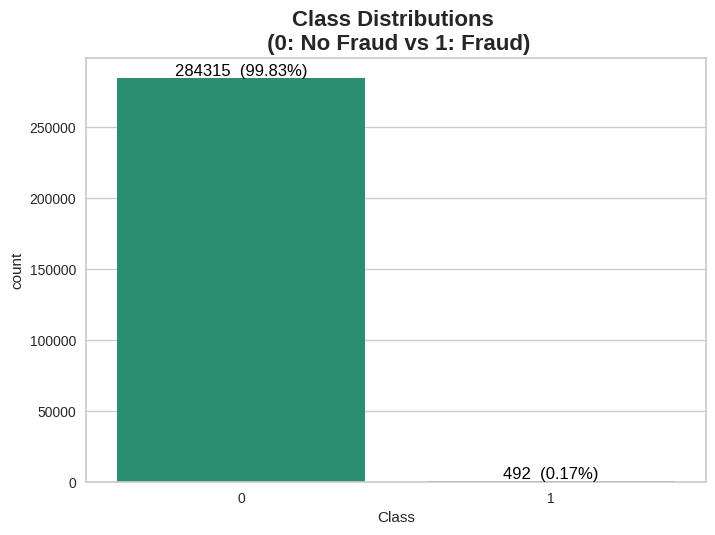

In [ ]:
# Visualise and compare the frequency of fraud and non-fraud categories in the data.
ax = sns.countplot(data=df, x="Class", palette="Dark2")

# Add text on the bars
for p in ax.patches:
    height = round(p.get_height())
    percentage = (height / len(df['Class'])) * 100
    ax.annotate(f'{height}  ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Class Distributions \n (0: No Fraud vs 1: Fraud)', fontdict={"fontweight": "bold", "fontsize": 16})
plt.show()

In [ ]:
# Define function to plot the distribution of the features for fraud and non-fraud transactions
def plot_distribution(data, title):
    fig, axes = plt.subplots(6, 5, figsize=(15, 15))

    axes = axes.flatten()

    fig.suptitle(title, fontsize=18, fontweight="bold", y=1.0)

    for ax, col in zip(axes, data.columns):
        sns.kdeplot(data[data['Class'] == 0][col], label='Class 0', ax=ax)
        sns.kdeplot(data[data['Class'] == 1][col], label='Class 1', ax=ax)

    # Display one legend for all the subplots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncols=2, fontsize=16,
                bbox_to_anchor=[0.5, 0.99])

    plt.tight_layout()
    plt.show()

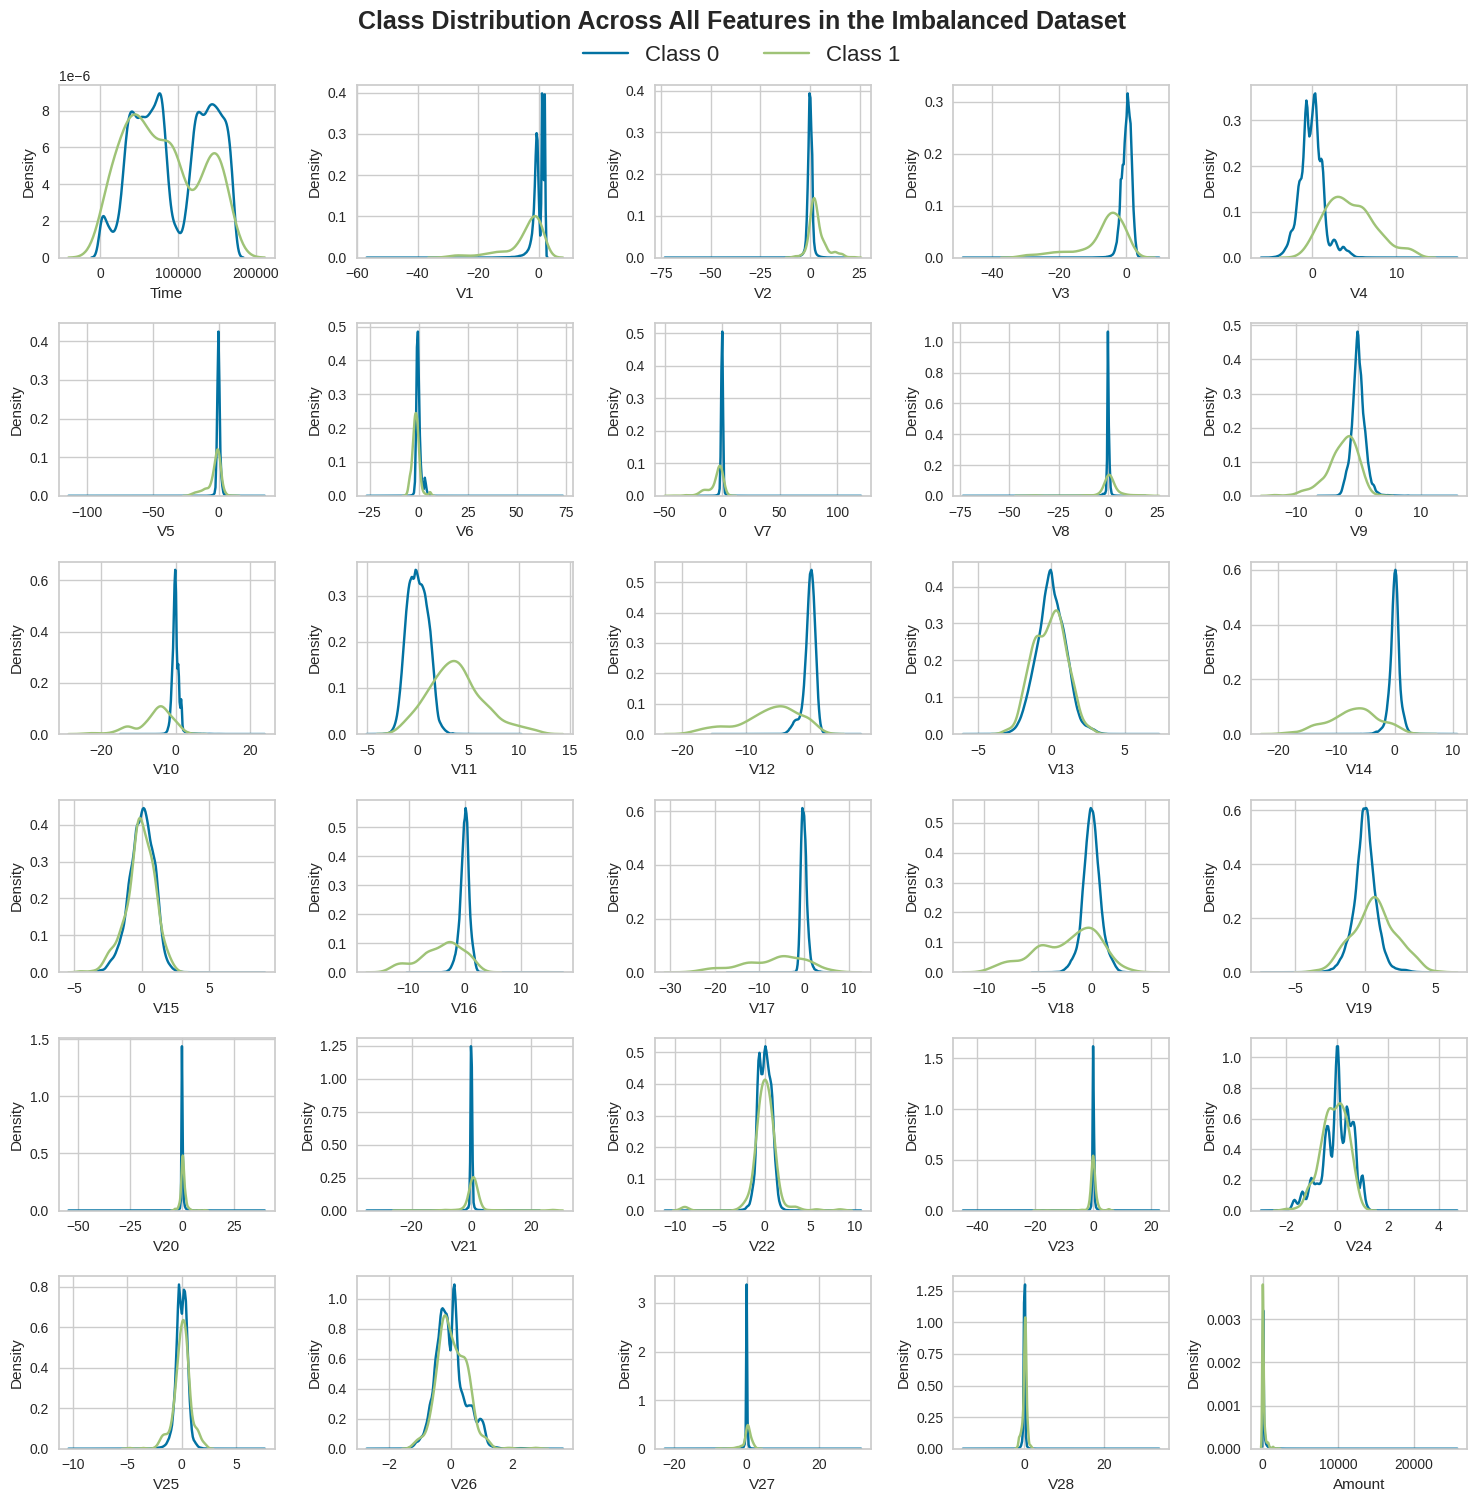

In [ ]:
# Visualize the distribution of the features across different Class categories
plot_distribution(df, "Class Distribution Across All Features in the Imbalanced Dataset")

## Data Preprocessing

Before proceeding with the model training, we will have to preprocess the data. Scaling is essential for distance-based algorithms such as KNN and SVM. These algorithms calculate distances between data points, and features with larger scales can disproportionately influence the distance metric. Scaling also ensures that optimization algorithms that use gradient descent to minimize loss function and find the optimal parameters converges faster, leading to quicker training times and more efficient model training

As stated earlier, all the input features have already been scaled except Time and Amount. From the boxplot, we can see that the Amount feature has outliers, so we would use **Robust Scaler** which is not sensitive to outliers.

RobustScaler uses the median and interquartile range for scaling, this makes it less sensitive to outliers in the data, as outliers have less influence on the median and IQR compared to the mean and standard deviation used in standard scaling techniques. It also preserves the shape of the original distribution and does not assume that the data follows a normal distribution.

Also, we will utilize PyCaret's balancing capabilities to handle the class imbalance. For the model training with the undersampled data we will use pycaret to apply **NearMiss** undersampling technique, and for the model training with the oversampled data, we will use pycaret to apply **SMOTE** oversampling technique to the dataset.

In [ ]:
# Scale the Time and Amount feature
robust_scaler = RobustScaler()

df['Amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


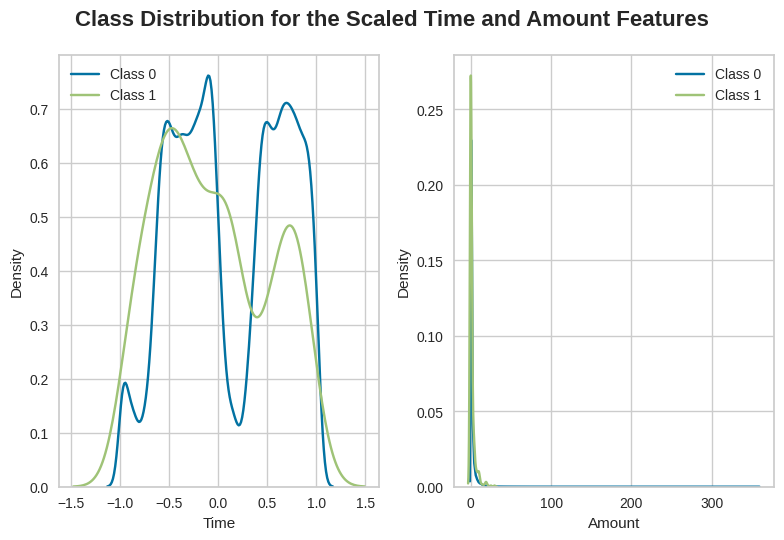

In [ ]:
# View the distribution of the scaled features to verify that the shape of the original distribution is preserved
fig, axes = plt.subplots(1, 2)

axes = axes.flatten()

fig.suptitle("Class Distribution for the Scaled Time and Amount Features", fontsize=16, fontweight="bold")

for ax, col in zip(axes, ['Time', 'Amount']):
    sns.kdeplot(df[df['Class'] == 0][col], label='Class 0', ax=ax)
    sns.kdeplot(df[df['Class'] == 1][col], label='Class 1', ax=ax)
    ax.legend()

plt.tight_layout()
plt.show()

We use PCA to reduce the data into two dimensions and make a scatter plot of this lower dimensional data. The x and y in the PCA plot represent the two principal components that explain the most variance in the data. Each point in the plot corresponds to a data sample.

From the plot we can see that fraudulent transactions tend to cluster together and there are more legitimate transactions than fraudulent transactions.

In [ ]:
# Create a scatter plot of the lower-dimensional data
def data_plot(data, title):

    # Separate the features and target variable
    X = data.drop('Class', axis=1)
    y = data['Class']

    # Create 2 principal components for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Make the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Class (0: Non-Fraudulent, 1: Fraudulent)')

    plt.show()

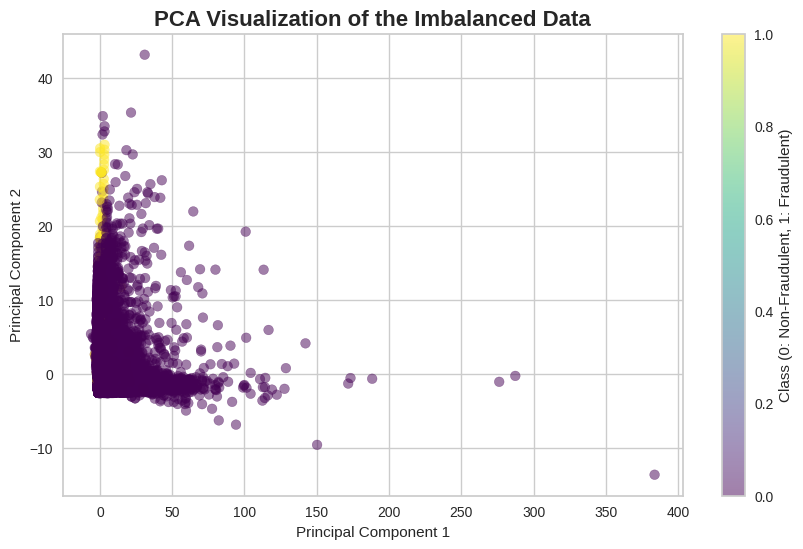

In [ ]:
data_plot(df, 'PCA Visualization of the Imbalanced Data')

## Using Imbalanced Data

We will compare the performance of four diiferent machine learning classifiers on the original imbalanced dataset. This will help us establish a baseline performance and understand how the models perform in its raw state before applying any balancing techniques

### Setup and Training

We use the Pycaret setup function to initialise the machine learning environment and prepare the dataset for model training. By specifying target='Class', we instruct PyCaret to treat the 'Class' variable as the target variable that our machine learning models will aim to predict. PyCaret automatically identifies the target variable and separates it from the feature columns during the setup process.

The session_id serves as a random seed for reproducibility purposes. By default, pycaret uses 70% of the dataset passed to it for training and validation, while the remaining 30% is the test hold-out data that would be used for evaluation. The dataset is splitted into training and test data by stratifying over the target column to preserve the percentage of samples for each class in both the training and test data.

PyCaret employs k-fold cross-validation on the training set. By default (unless a fold option is provided) the training set is divided into 10 subsets, and the model is trained and evaluated 10 times, each time using a different fold as the validation set and the remaining folds as the training set. This allows the model to be trained and evaluated on different subsets of the data, providing more robust performance estimates.

In [ ]:
clf_imbalance = setup(df, target='Class', session_id=123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Retrieve the transformed training and testing data from PyCaret's configuration
ytrain = get_config("y_train_transformed")
xtrain = get_config("X_train_transformed")
ytest = get_config("y_test_transformed")
xtest = get_config("X_test_transformed")

# Show the counts of each class in the transformed target variables for both training and testing sets
print("Class distribution of train data:", Counter(ytrain))
print("Class distribution of test data:", Counter(ytest))

Class distribution of train data: Counter({0: 199020, 1: 344})
Class distribution of test data: Counter({0: 85295, 1: 148})


The count plot shows that the data was split in such a way that the frequency distribution of the  Class categories in the training and test dataset is the same as that of the original dataset

In [ ]:
# Define function to plot the counts of observations in each category of the Class column
def plot_count(train_data, test_data, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))

    fig.suptitle(title, fontweight='bold', fontsize= 18)

    for i, ax in enumerate(axes):
        data = train_data if i == 0 else test_data
        sns.countplot(data=data, x="Class", ax=ax, palette='Dark2')
        title = 'Training Data' if i == 0 else 'Test Data'
        ax.set_title(title)

        for p in ax.patches:
            height = round(p.get_height())
            percentage = (height / len(data['Class'])) * 100
            ax.annotate(f'{height}  ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

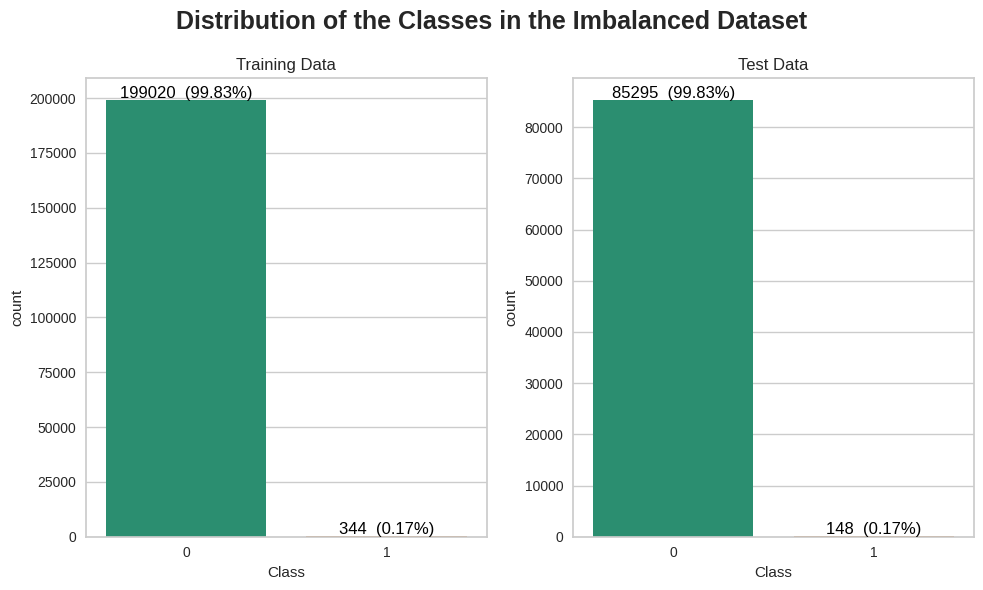

In [ ]:
# Show the visual representation of the frequency distribution of each category of the target variable in the training and test dataset
plot_count(pd.DataFrame(ytrain), pd.DataFrame(ytest), 'Distribution of the Classes in the Imbalanced Dataset')

We compare the performance of the models using Pycaret compare_models function and sort the models based on the **F1** metric instead of the accuracy, as accuracy alone may not be an appropriate metric for evaluating model performance on an imbalanced dataset.

The best model is chosen based on the F1 metric because we want to detect as many fraudulent transactions as possible (high Recall) while raising fewer false alarms, i.e reducing the chances of misclassifying a non-fraudulent transaction as fraudulent (high Precision). The F1 metric is the harmonic mean of precision and recall and provides a balance between the two metrics.

The Precision is the proportion of true positive predictions out of all positive predictions made by the model, while Recall is the proportion of true positive predictions out of all actual positive instances in the data.

The best performing model based on the F1 score is then stored in the variable **best_model**.

The shown output below is a score grid with the average cross validated scores for the different models.

In [ ]:
models_imbalanced = compare_models(include=['lr', 'knn', 'rf', 'svm'], n_select=4, sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9566,0.7969,0.9528,0.8668,0.8666,0.8706,40.1450
knn,K Neighbors Classifier,0.9995,0.9259,0.7792,0.9128,0.8398,0.8396,0.8427,13.3230
lr,Logistic Regression,0.9992,0.9811,0.6429,0.8886,0.7438,0.7435,0.7543,0.2990
svm,SVM - Linear Kernel,0.9991,0.0000,0.5816,0.8780,0.6973,0.6969,0.7129,0.2400


Processing:   0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
best_model_imbalanced = models_imbalanced[0]

best_model_imbalanced

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

### Evaluation
We compare the performance of the models and assess the performance of the best performing model on the hold-out test dataset.

Note that the hold-out test data is separate from the validation data, which is typically used for hyperparameter tuning during model training. The hold-out test data is used for final evaluation to assess how well the trained model generalizes to unseen data.

In [ ]:
# Define function to plot the precision and recall obtained on the hold-out test set for the different models
def plot_compare_models(models, title):
    metrics = pd.DataFrame()

    for model in models:
        # This would make predictions for the test data
        predict_model(model, verbose=False)
        # Pull the model evaluation metrics DataFrame from PyCaret
        model_metric = pull()
        metrics = pd.concat([metrics, model_metric], axis=0)

    metrics.reset_index(inplace=True, drop=True)
    print(metrics, "\n\n")

    fig, ax = plt.subplots()

    metrics.plot(x="Model", y=["Recall", "Prec."], kind="bar", ax=ax)

    ax.set_title(title, fontweight="bold")
    ax.tick_params(axis='x', labelrotation=0)
    ax.legend(ncol=2)

    # Add text on the bars
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height(), 3)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center')

    plt.show()

                      Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.9994  0.9272  0.6959  0.9196  0.7923  0.7920   
1    K Neighbors Classifier    0.9994  0.8985  0.7162  0.9298  0.8092  0.8089   
2       Logistic Regression    0.9992  0.9677  0.6149  0.8750  0.7222  0.7218   
3       SVM - Linear Kernel    0.9990  0.7668  0.5338  0.8404  0.6529  0.6524   

      MCC  
0  0.7997  
1  0.8158  
2  0.7331  
3  0.6693   




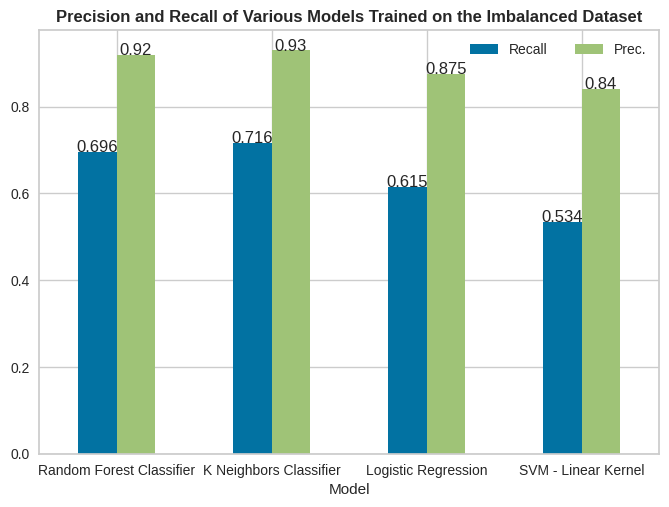

In [ ]:
plot_compare_models(models_imbalanced, "Precision and Recall of Various Models Trained on the Imbalanced Dataset")

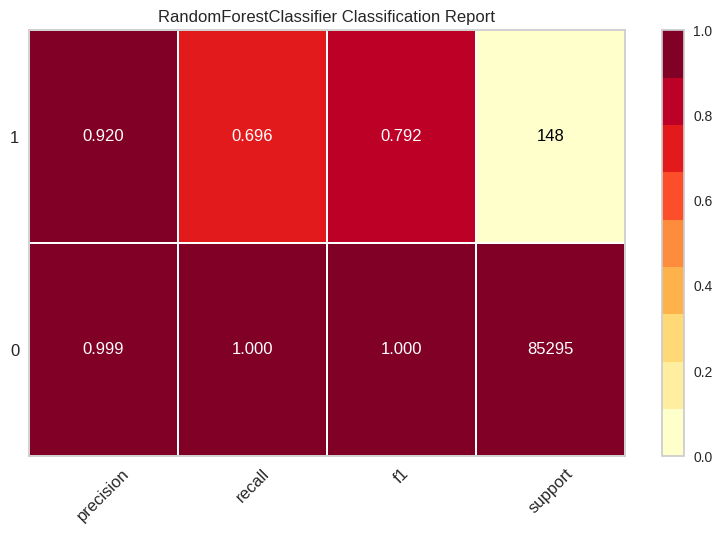

In [ ]:
# Visualise the classification report for the best performing model
plot_model(best_model_imbalanced, "class_report")

The Precision-Recall curve is particularly useful for imbalanced datasets because it focuses on the performance of positive class predictions, which are often of greater interest. It helps to visualise the trade-off between the precision and recall across different probability thresholds.

A higher AUC-PR value indicates better overall performance, with the model achieving higher Precision while maintaining high Recall.

The closer the area under the curve (AUC, estimated by the average precision) is to 1, the better the performance of the model. In this case the AUC-PR is 0.81.

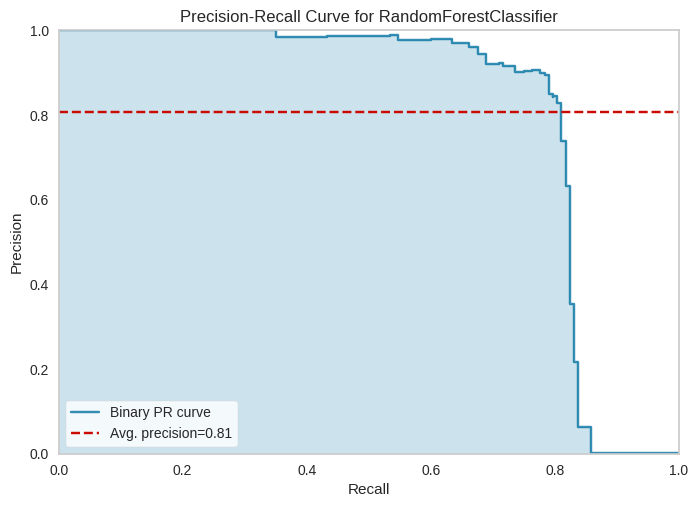

In [ ]:
plot_model(best_model_imbalanced, "pr")

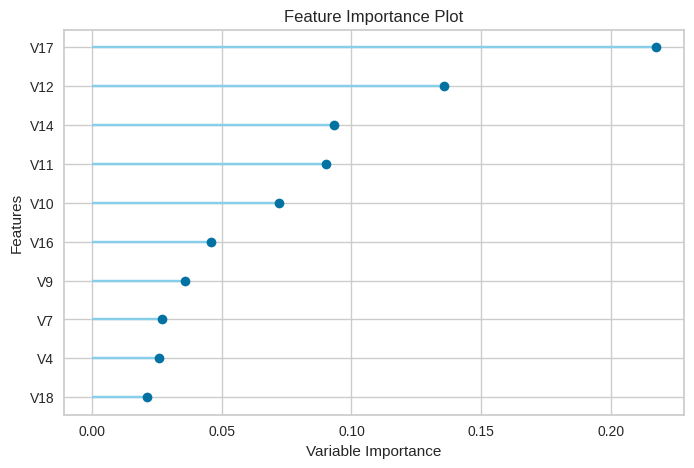

In [ ]:
# Show the features that have the most significant influence on the model's predictions
plot_model(best_model_imbalanced, "feature")

## Using Undersampled Data
After initially training our model on the imbalanced dataset, we will apply undersampling to create a balanced training subset. This involves randomly selecting a subset of instances from the majority class to match the number of instances in the minority class.

### Setup and Preprocessing
80% of the data is allocated to the training set to ensure that we have sufficient instances to train the model effectively. The remaining 20% of the data is allocated to the test set for evaluating the model's performance on unseen data.

We will balance the data by using NearMiss undersampling technique. NearMiss works by reducing the number of majority class instances by keeping only those that are most similar to minority class instances.

There are three different NearMiss strategies, for this project we will use NearMiss-3 which selects samples from the majority class that are closest to the centroid of the minority class. It focuses on instances whose average distance to the centroid of the minority class is the smallest.

By removing majority class instances that are farthest from or least similar to the minority class instances, NearMiss helps in reducing the dominance of the majority class and improving the model's ability to learn patterns from the minority class. However, it may discard potentially useful information from the majority class especially when the minority class has very few entries.

In [ ]:
near_miss3 = NearMiss(version=3)
clf_undersample = setup(df, target = 'Class', session_id = 123, fix_imbalance=True,
                        fix_imbalance_method=near_miss3, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(57683, 31)"
5,Transformed train set shape,"(721, 31)"
6,Transformed test set shape,"(56962, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


The Class count shows that undersampling was only applied to the training data as expected. It is essential to keep the test data unbalanced to obtain reliable and unbiased evaluations of the model's performance and its ability to generalize to real-world, imbalanced datasets

In [ ]:
# Retrieve the transformed training and testing data from PyCaret's configuration
ytrain = get_config("y_train_transformed")
xtrain = get_config("X_train_transformed")
xtest = get_config("X_test_transformed")
ytest = get_config("y_test_transformed")

# Show the counts of each class in the transformed target variables for both training and testing sets
print("Class distribution of train data:", Counter(ytrain))
print("Class distribution of test data:", Counter(ytest))

Class distribution of train data: Counter({1: 394, 0: 327})
Class distribution of test data: Counter({0: 56864, 1: 98})


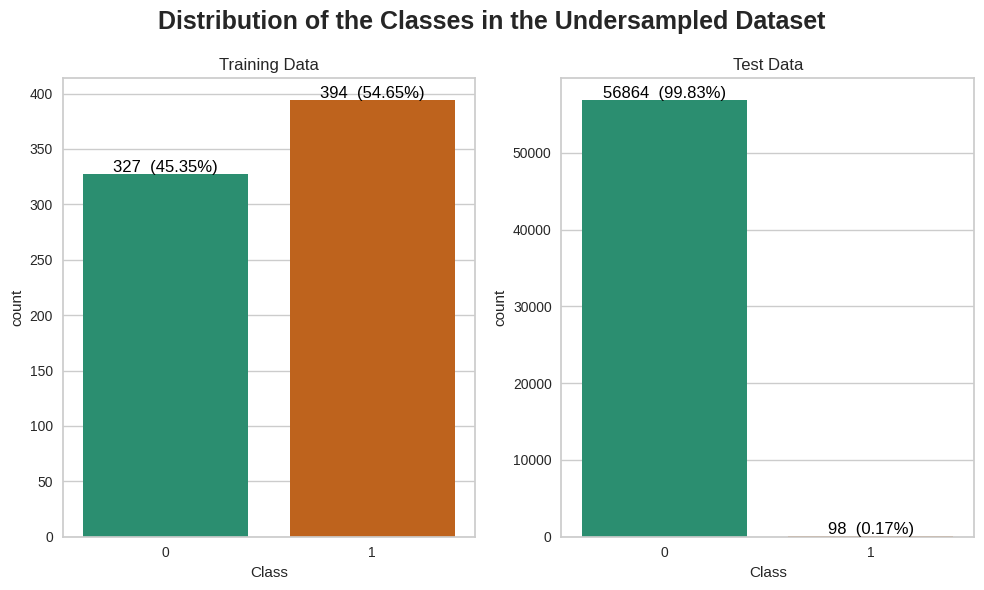

In [ ]:
# Get dataframe containing the training dataset
df_train_undersampled = pd.concat([xtrain, ytrain], axis=1)
df_test_undersampled = pd.concat([xtest, ytest], axis=1)

# Show the visual representation of the distribution of each category of the target variable in the training and test dataset
plot_count(df_train_undersampled, df_test_undersampled, 'Distribution of the Classes in the Undersampled Dataset')

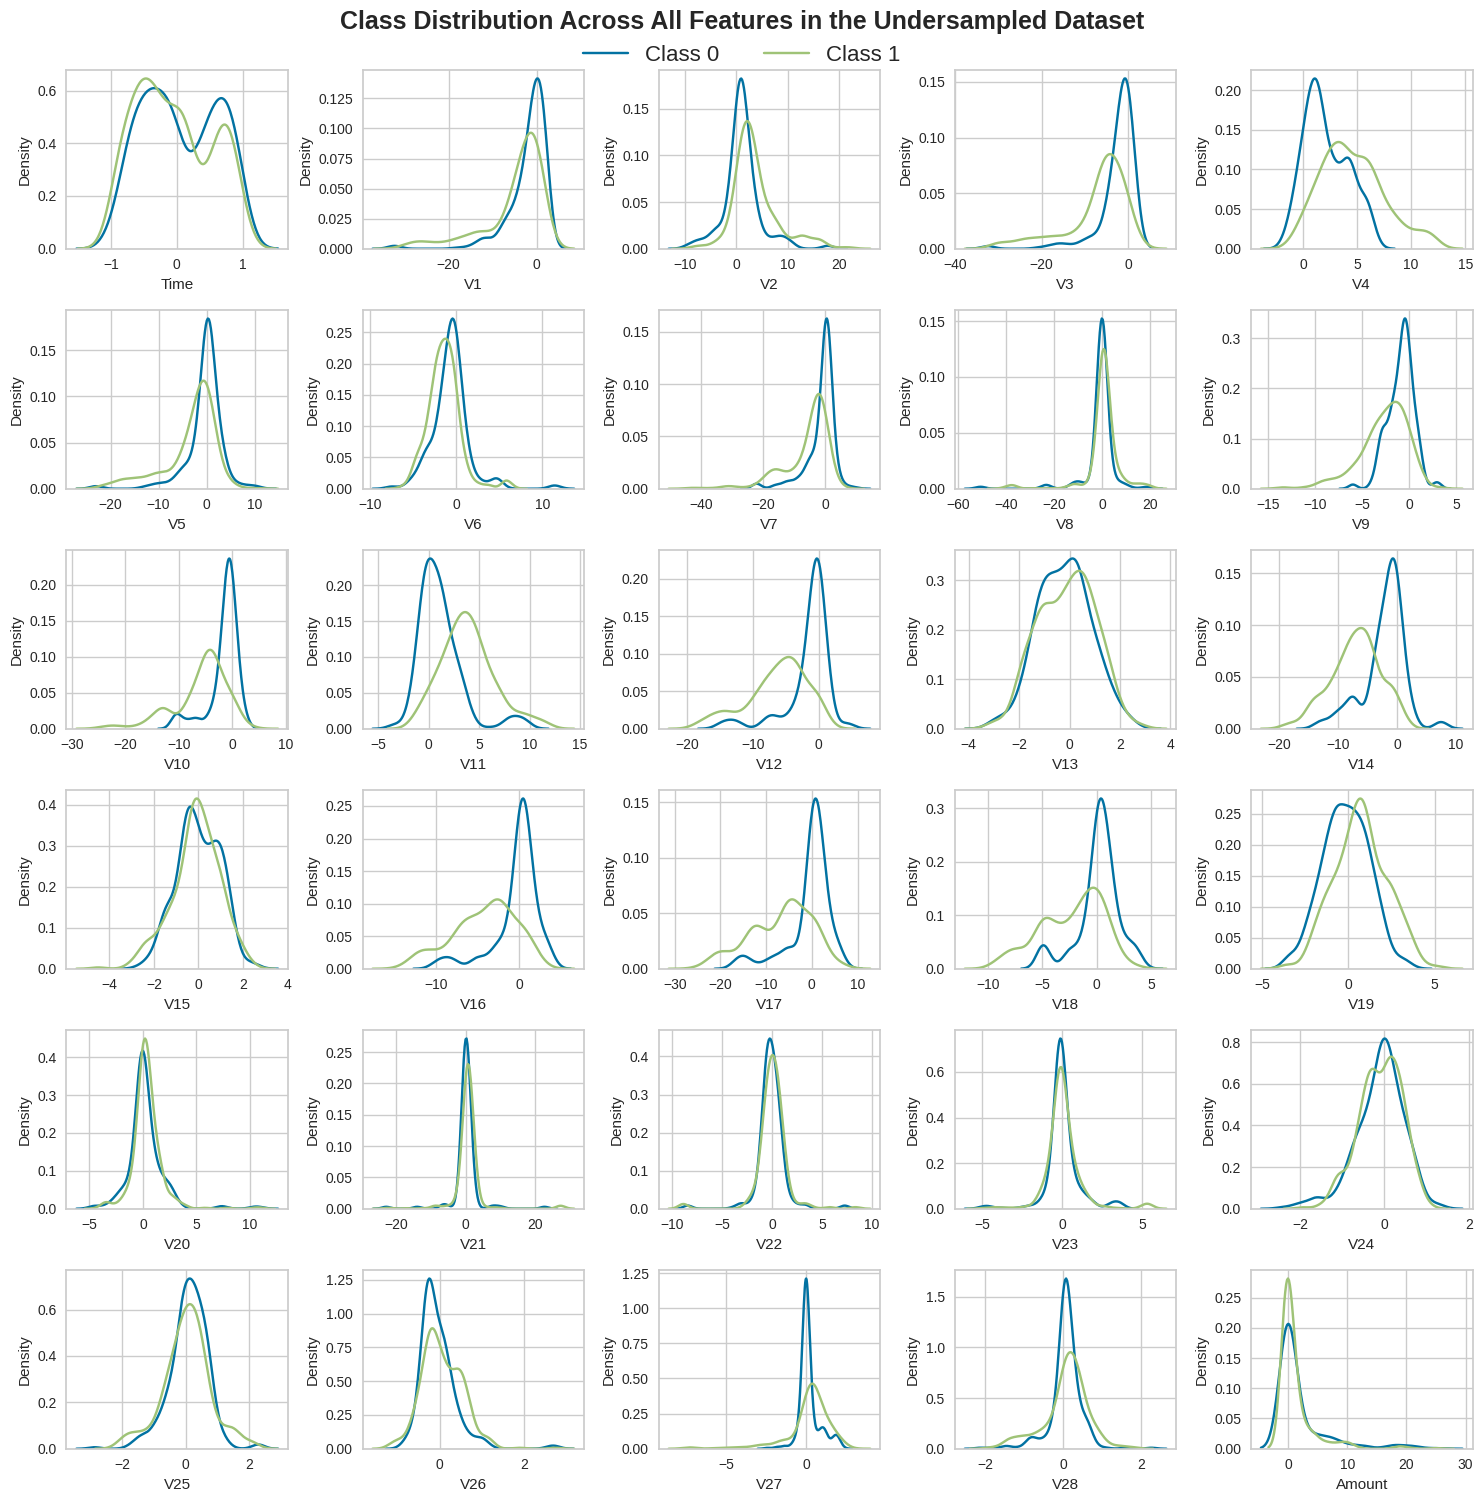

In [ ]:
# Explore the distribution of the features across the different classes
plot_distribution(df_train_undersampled, "Class Distribution Across All Features in the Undersampled Dataset")

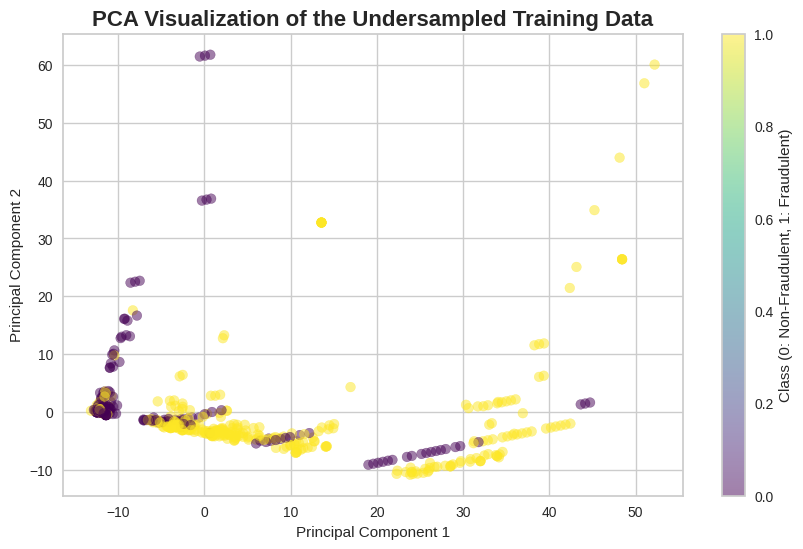

In [ ]:
data_plot(df_train_undersampled, 'PCA Visualization of the Undersampled Training Data')

In [ ]:
# Compare the performance of the models when trained on the undersampled dataset.
# We set n_select to 4 because we want compare_models function to return the 4 trained models
models_undersampled = compare_models(include=['lr', 'knn', 'rf', 'svm'], sort="F1", n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9970,0.9325,0.8349,0.3662,0.5023,0.5011,0.5475,0.4420
knn,K Neighbors Classifier,0.9964,0.9252,0.7892,0.3074,0.4400,0.4385,0.4895,0.6630
lr,Logistic Regression,0.8727,0.8983,0.7971,0.0108,0.0213,0.0179,0.0833,0.2730
svm,SVM - Linear Kernel,0.8518,0.0000,0.8017,0.0095,0.0189,0.0155,0.0772,0.2810


Processing:   0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
# The best model measured in terms of the F1 score is the first model in the returned models
best_model_undersampled = models_undersampled[0]
best_model_undersampled

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

### Evaluation
We evaluate the performance of the best performing model using the hold-out test dataset. The first two plots show that even the best performing model has a very low precision, indicating that many of the instances predicted as positive (fraudulent) by the model are actually not fraudulent. This could lead to unnecessary actions, potentially resulting in increased operational costs and user dissatisfaction.

                      Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.9964  0.9086  0.7551  0.2913  0.4205  0.4190   
1    K Neighbors Classifier    0.9955  0.8380  0.7041  0.2331  0.3503  0.3486   
2       Logistic Regression    0.8685  0.8806  0.7653  0.0099  0.0196  0.0163   
3       SVM - Linear Kernel    0.8423  0.8293  0.8163  0.0088  0.0175  0.0141   

      MCC  
0  0.4677  
1  0.4035  
2  0.0775  
3  0.0747   




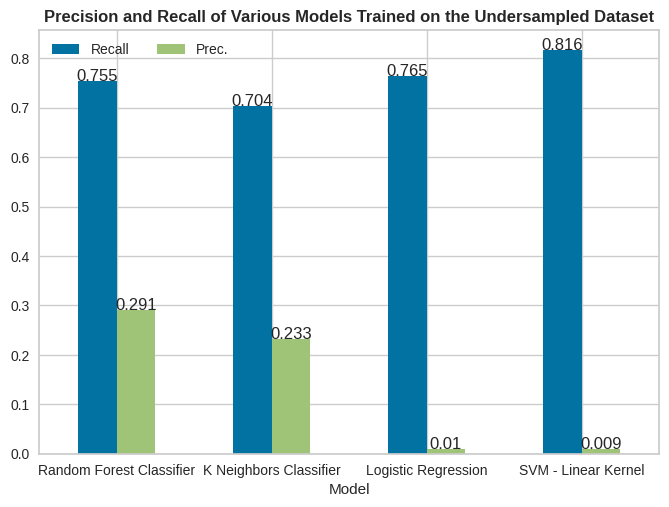

In [ ]:
plot_compare_models(models_undersampled, "Precision and Recall of Various Models Trained on the Undersampled Dataset")

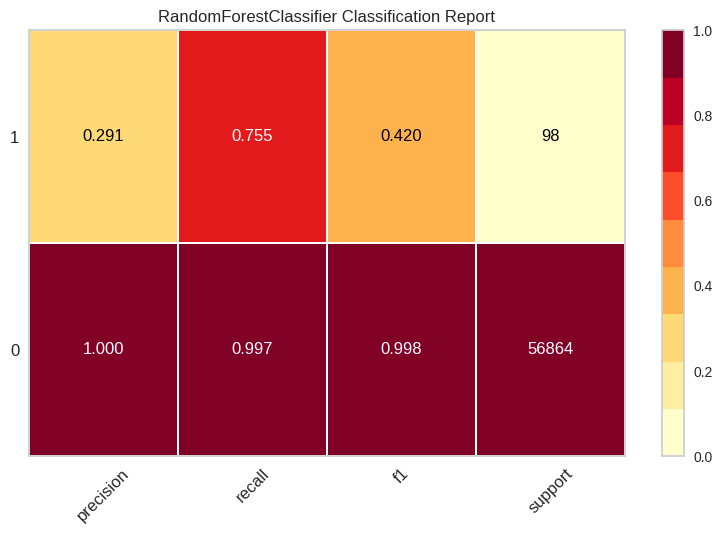

In [ ]:
# Show the classification report obtained from the best model
plot_model(best_model_undersampled, "class_report")

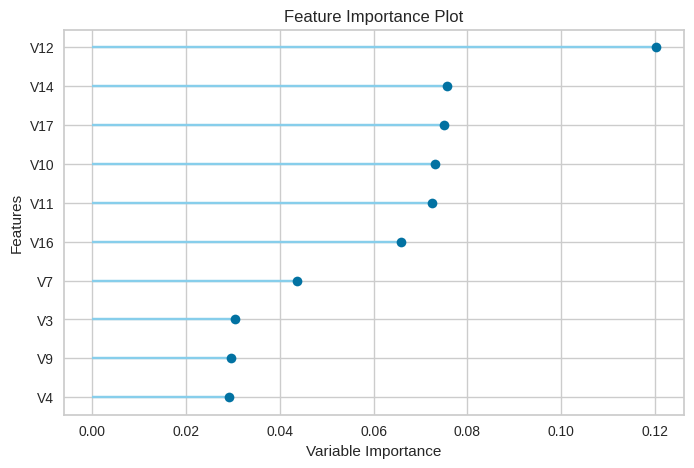

In [ ]:
plot_model(best_model_undersampled, "feature")

The Area Under the Precision-Recall Curve (AUC-PR) considers the precision-recall trade-off across different threshold values for positive class prediction. the AUC-PR value is measured as the Average precision.

The best performing model had a fairly good AUC-PR value 0f 0.73 even though the classification reports shows that the model has high false positive rate. This indicates that the model performs well at certain threshold values but poorly at others (one of which is the default 0.5 threshold that was used to train the model).

Since this score is still lower than what we obtained from the model trained on the imbalanced set, we wouldn't bother finding the optimal threshold for this classifier.

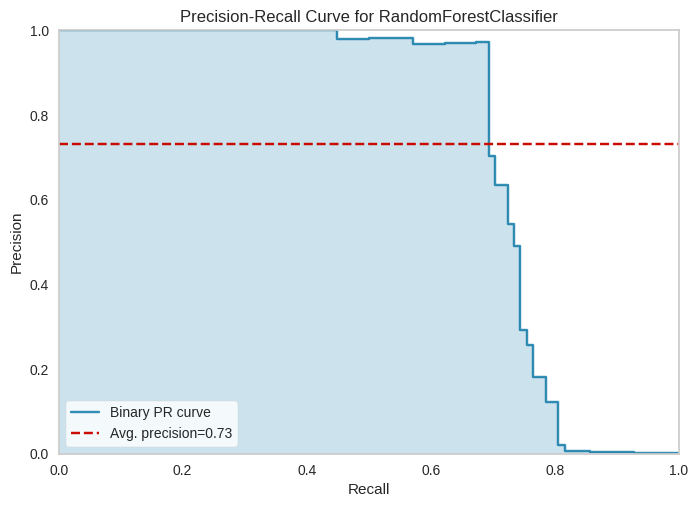

In [ ]:
plot_model(best_model_undersampled, "pr")

## Using OverSampled Data

Finally, since undersampling performed worse than training on the imbalanced datatset, we will explore **Oversampling** which involves increasing the number of instances in the minority class to balance the dataset.

The oversampling technique we'll use is SMOTE (Synthetic Minority Over-sampling) which is the default method for addressing imbalance in Pycaret. SMOTE generates new synthetic samples by interpolating between existing minority class instances.

70% of the dataset will be used for training and validation, while the remaing 30% will be the hold-out test data (This is the default in Pycaret).

Also oversampling would only be applied to the train data and not the test data.

### Setup and Preprocessing

In [ ]:
clf_oversample = setup(df, target = 'Class', session_id=123, fix_imbalance=True, fix_imbalance_method="SMOTE")

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(483483, 31)"
5,Transformed train set shape,"(398040, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Get the training and test data and verify that the training data has been
# balanced while the test data is still imbalanced

ytrain = get_config("y_train_transformed")
xtrain = get_config("X_train_transformed")
ytest = get_config("y_test_transformed")

print("Class distribution of train data:", Counter(ytrain))
print("Class distribution of test data:", Counter(ytest))

Class distribution of train data: Counter({0: 199020, 1: 199020})
Class distribution of test data: Counter({0: 85295, 1: 148})


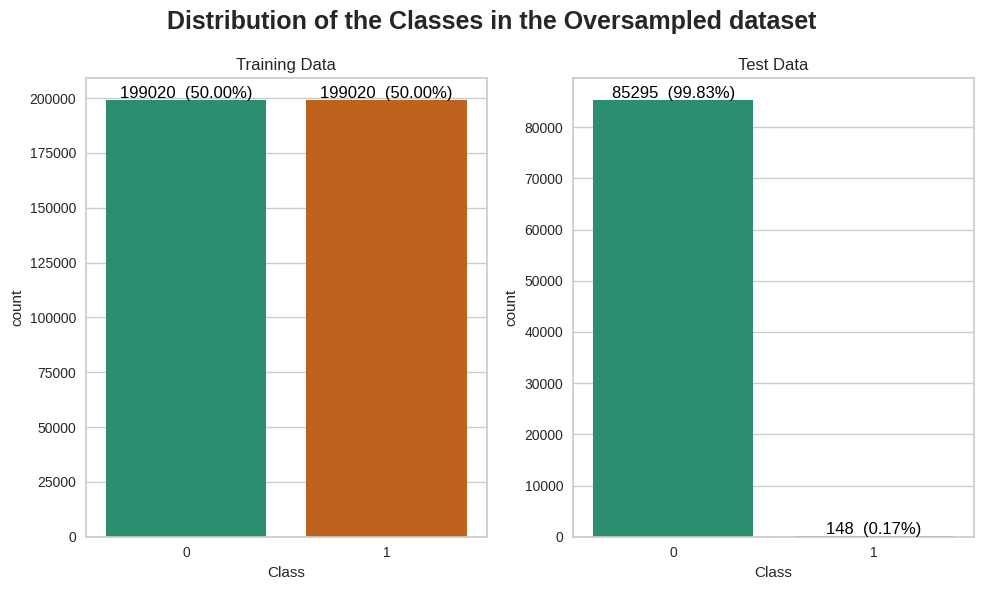

In [ ]:
df_train_oversampled = pd.concat([xtrain, ytrain], axis=1)
df_test_oversampled = pd.concat([xtest, ytest], axis=1)

# Show the visual representation of the frequency distribution of each category of the target variable in the training and test dataset
plot_count(df_train_oversampled, df_test_oversampled, 'Distribution of the Classes in the Oversampled dataset')

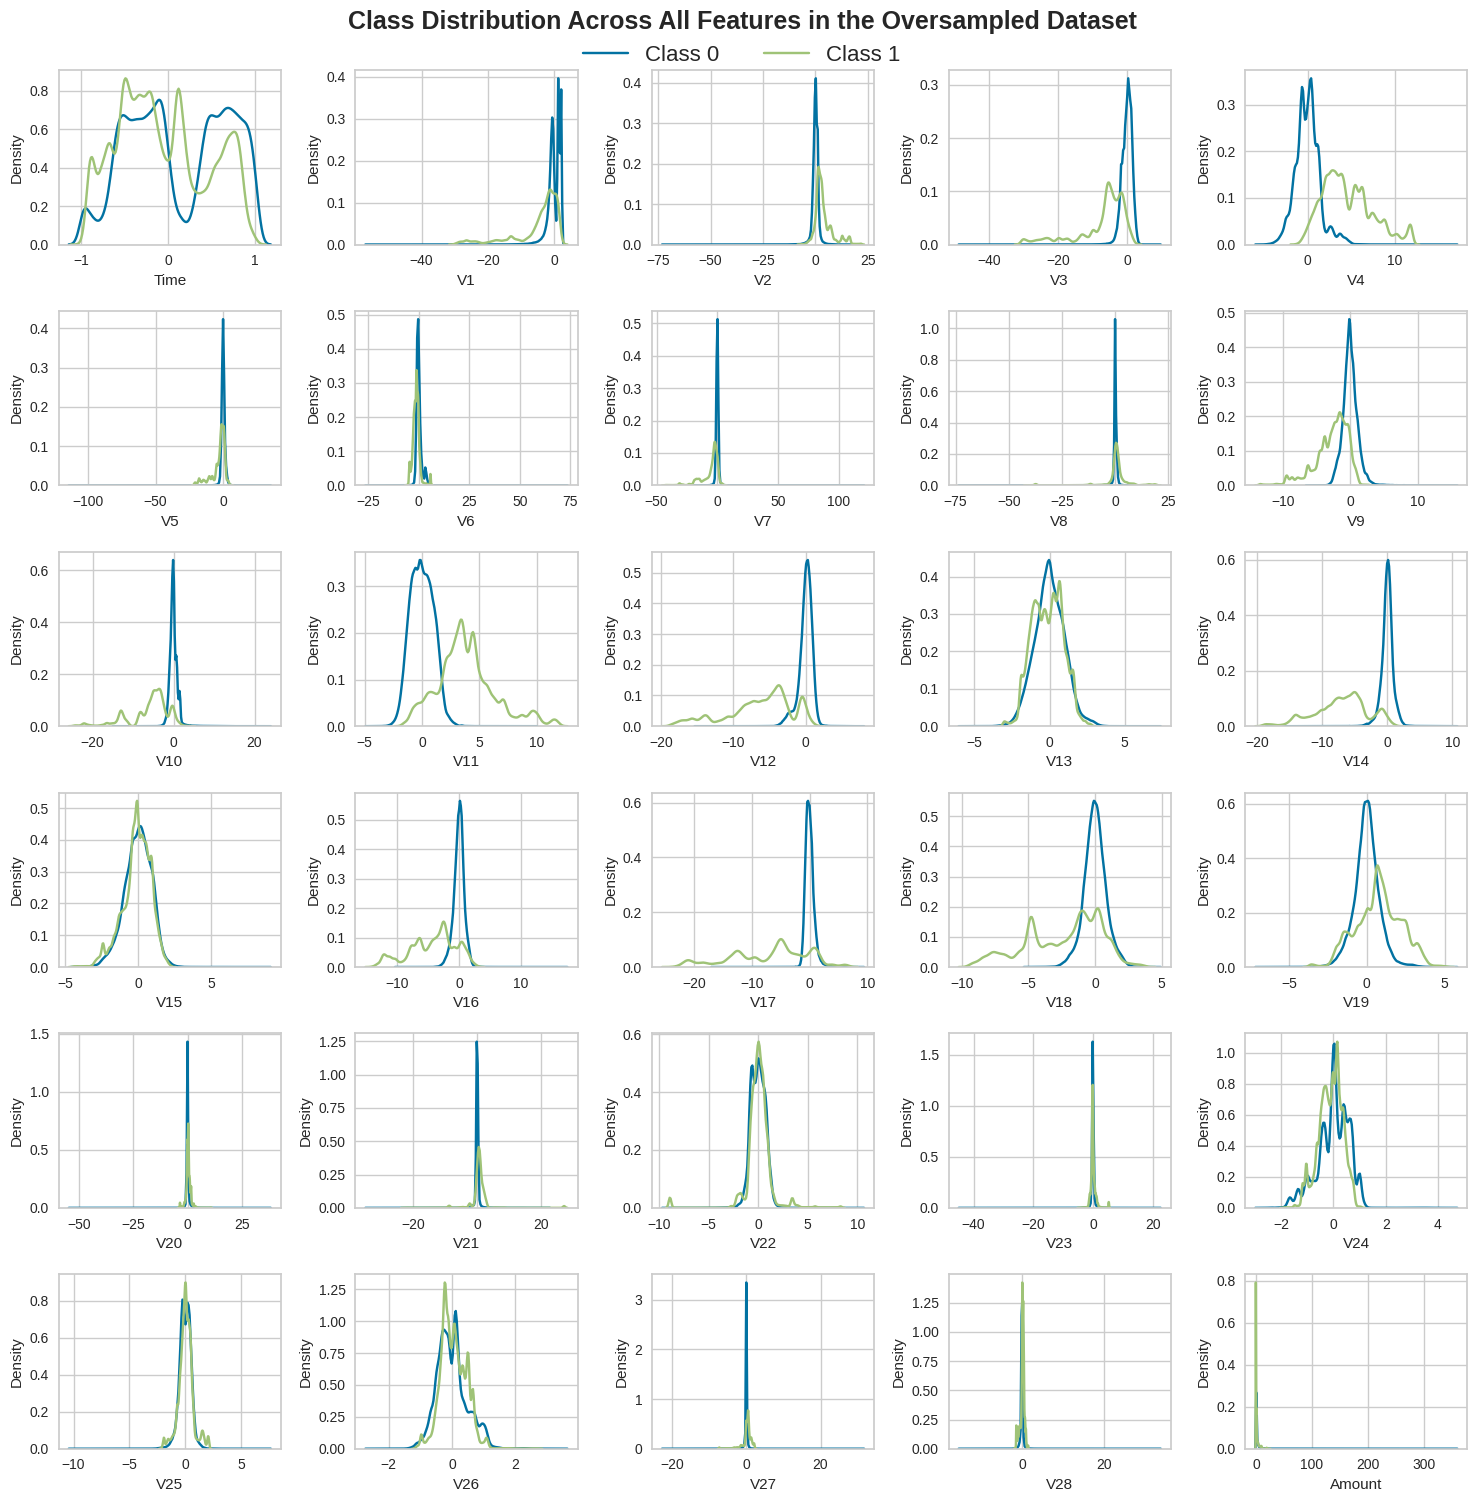

In [ ]:
# Explore the distribution of the features across the different classes
plot_distribution(df_train_oversampled, "Class Distribution Across All Features in the Oversampled Dataset")

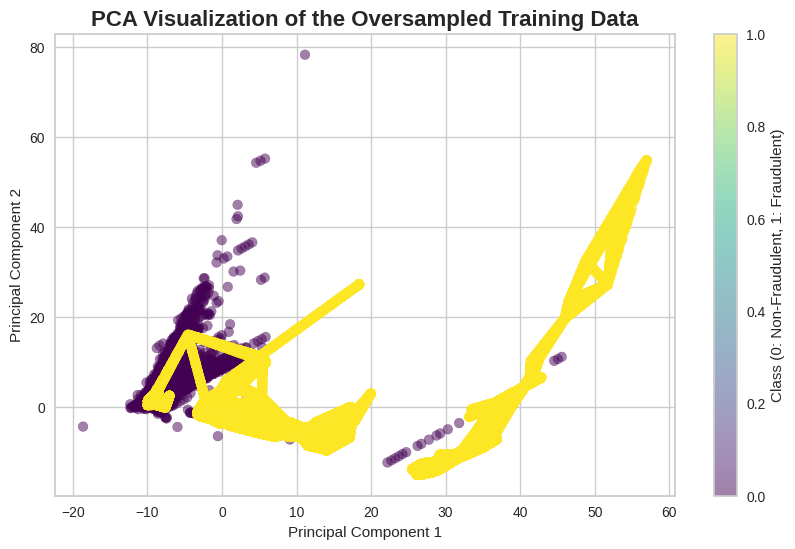

In [ ]:
data_plot(df_train_oversampled, 'PCA Visualization of the Oversampled Training Data')

In [ ]:
# Compare the performance of the models when trained on the oversampled dataset
models_oversampled = compare_models(include=['lr', 'knn', 'rf', 'svm'], sort="F1", n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9779,0.8373,0.8980,0.8661,0.8659,0.8667,72.8570
knn,K Neighbors Classifier,0.9984,0.9401,0.8666,0.5158,0.6456,0.6448,0.6673,26.5640
lr,Logistic Regression,0.9783,0.9817,0.9159,0.0685,0.1275,0.1246,0.2472,1.4720
svm,SVM - Linear Kernel,0.9775,0.0000,0.9275,0.0679,0.1263,0.1234,0.2469,0.7240


Processing:   0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
# The best performing model is the first model in the returned models
best_model_oversampled = models_oversampled[0]

best_model_oversampled

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

### Evaluation
Assess the performance of the best performing model on the hold-out test dataset. The First plot shows that Random Forest Classifier performed better than the other models. Subsequent evaluations are made on the best performing model.

                      Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Random Forest Classifier    0.9994  0.9538  0.7635  0.8968  0.8248  0.8245   
1    K Neighbors Classifier    0.9984  0.9084  0.8176  0.5284  0.6419  0.6412   
2       Logistic Regression    0.9790  0.9679  0.8649  0.0672  0.1247  0.1219   
3       SVM - Linear Kernel    0.9807  0.9229  0.8649  0.0727  0.1342  0.1314   

      MCC  
0  0.8272  
1  0.6566  
2  0.2377  
3  0.2476   




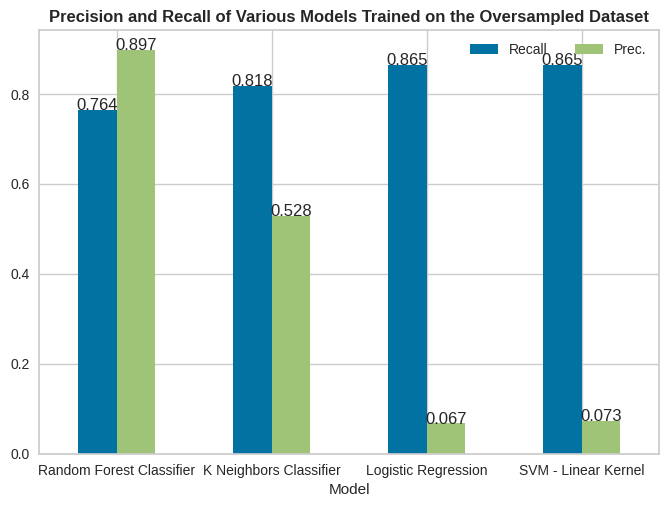

In [ ]:
# Compare the precision and recall obtained from the various models
plot_compare_models(models_oversampled, "Precision and Recall of Various Models Trained on the Oversampled Dataset")

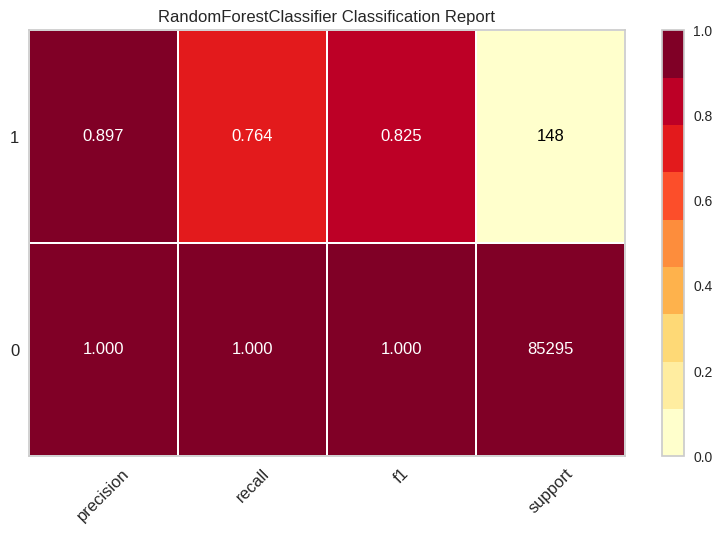

In [ ]:
# Visualise the classification report for the best performing model
plot_model(best_model_oversampled, "class_report")

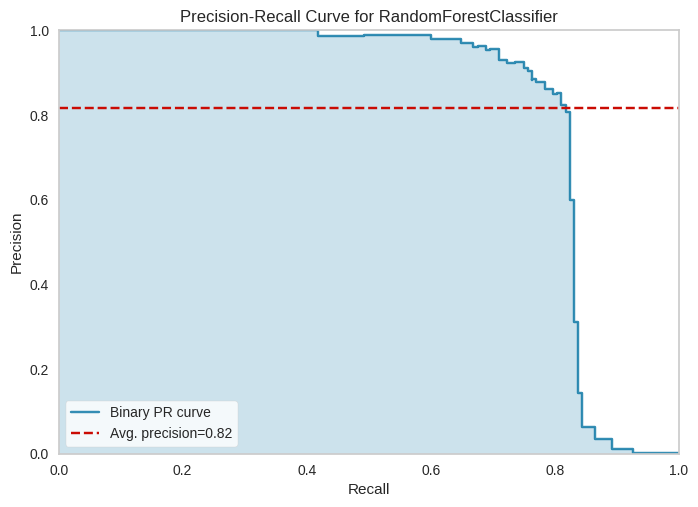

In [ ]:
# Plot the precision recall curve for the best performing model
plot_model(best_model_oversampled, "pr")

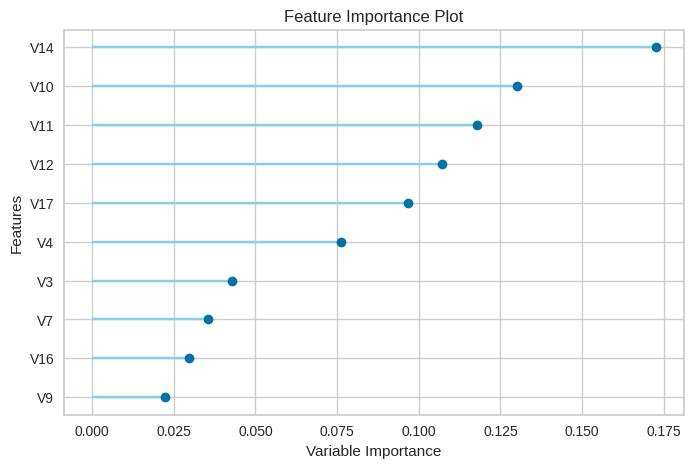

In [ ]:
# Show the features that have the most significant influence on the model's predictions
plot_model(best_model_oversampled, "feature")

## Optimisation of the Best Model obtained Using the Oversampled Data
To see if we can potentially improve the performance of the selected best performing model, we tune its hyperparameters using PyCaret's tune_model function. Hyperparameter tuning involves searching for the optimal set of hyperparameters that maximize the model's performance on the validation data.

In [ ]:
params_to_tune = {
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt", "log2"],
    'n_estimators': [100, 200]
}

tuned_model = tune_model(best_model_oversampled, optimize="F1", custom_grid=params_to_tune, search_algorithm="grid")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:24:02
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 8 candidates, totalling 80 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9992,0.9516,0.8000,0.7778,0.7887,0.7884,0.7884
1,0.9995,0.9507,0.8000,0.9333,0.8615,0.8613,0.8639
2,0.9995,0.9833,0.8286,0.9062,0.8657,0.8654,0.8663
3,0.9996,0.9835,0.9143,0.8649,0.8889,0.8887,0.8890
4,0.9997,0.9509,0.8824,0.9677,0.9231,0.9230,0.9239
5,0.9993,0.9823,0.7353,0.8333,0.7812,0.7809,0.7824
6,0.9997,0.9676,0.8824,0.9375,0.9091,0.9089,0.9094
7,0.9996,0.9658,0.9118,0.8611,0.8857,0.8855,0.8859
8,0.9996,0.9985,0.8235,0.9655,0.8889,0.8887,0.8915


In [ ]:
# The optimal criterion is "entropy" while the other hyper parameters remain the same
tuned_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

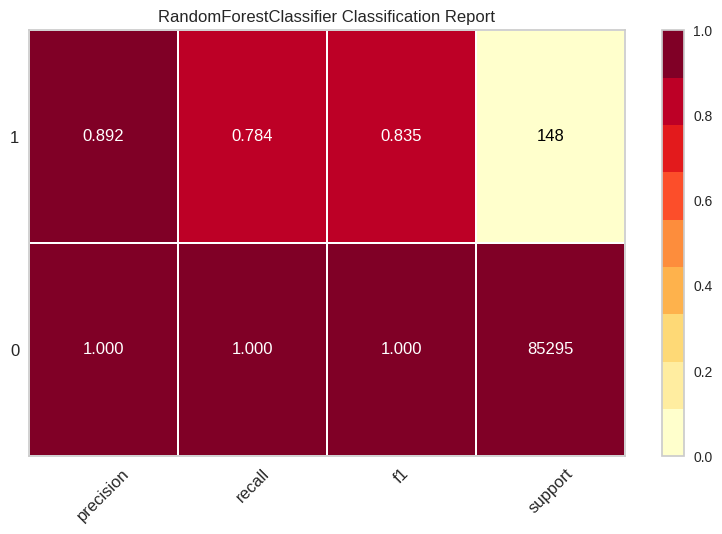

In [ ]:
plot_model(tuned_model, "class_report")

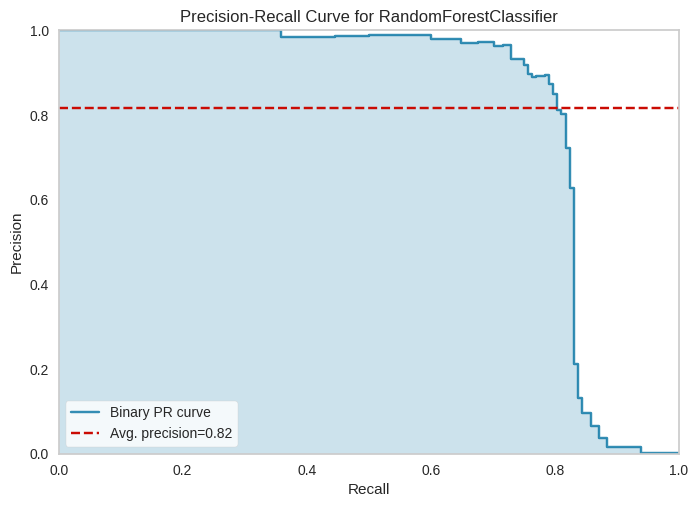

In [ ]:
# Show the tradeoff between precision and recall
# The average precision is the same as that of the baseline Random Forest classifier
plot_model(tuned_model, "pr")

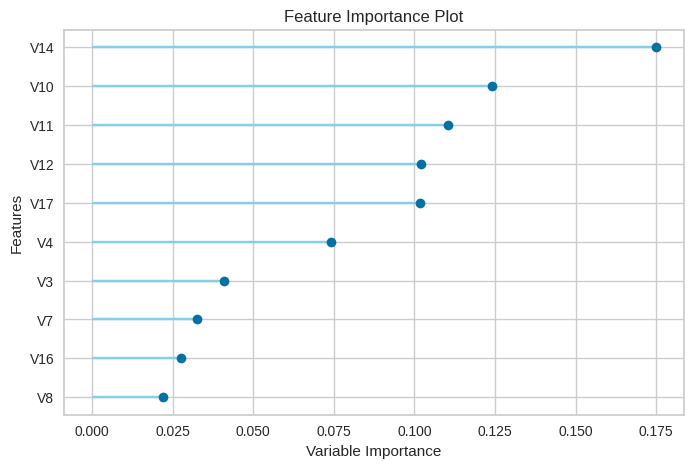

In [ ]:
plot_model(tuned_model, "feature")

                               Model  Accuracy     AUC  Recall   Prec.  \
0  Baseline Random Forest Classifier    0.9994  0.9538  0.7635  0.8968   
1     Tuned Random Forest Classifier    0.9995  0.9616  0.7838  0.8923   

       F1   Kappa     MCC  
0  0.8248  0.8245  0.8272  
1  0.8345  0.8343  0.8360   




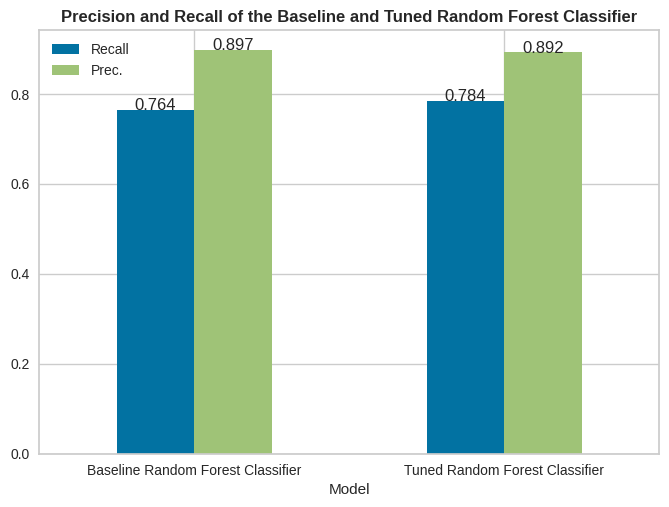

In [ ]:
# Plot the precision and recall obtained on the hold-out test set for the
# baseline and tuned Random forest classifier

metrics = pd.DataFrame()

for model in [best_model_oversampled, tuned_model]:
    # This would make predictions for the test data
    predict_model(model, verbose=False)
    # Pull the model evaluation metrics DataFrame from PyCaret
    model_metric = pull()
    metrics = pd.concat([metrics, model_metric], axis=0)

metrics.reset_index(inplace=True, drop=True)
metrics.iloc[0, 0] = "Baseline Random Forest Classifier"
metrics.iloc[1, 0] = "Tuned Random Forest Classifier"
print(metrics, "\n\n")

fig, ax = plt.subplots()

metrics.plot(x="Model", y=["Recall", "Prec."], kind="bar", ax=ax)

ax.set_title("Precision and Recall of the Baseline and Tuned Random Forest Classifier", fontweight="bold")
ax.tick_params(axis='x', labelrotation=0)

# Add text on the bars
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 3)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center')

plt.show()

In [ ]:
# Save the tuned model
save_model(tuned_model,  "/content/drive/MyDrive/fraud_detection/tuned_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  